- ## Individual Assignment  By
## OBBA MARK CALVIN B24277 S23B23/047

DATA DESCRIPTION 
(The data “Assignment 2.xlsx” shows the life-cycle savings of people from the years 1960-1970. The 
description of the variables are shown in the sheet “Descriptors” within the excel workbook) 

Importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

- Loading the data frame as excel using pandas

In [3]:
file_path = "C:/Users/UNETS COMPUTERS/OneDrive/Desktop/Work/Year 2/Data Science/Data science prac/Assignment 2.xlsx"
df = pd .read_excel(file_path)
df.tail(5)

,sr,pop15,pop75,dpi,ddpi
45,18.56,45.25,0.56,138.33,5.14
46,7.72,41.12,1.73,380.47,10.23
47,9.24,28.13,2.72,766.54,1.88
48,8.89,43.69,2.07,123.58,16.71
49,4.71,47.20,0.66,242.69,5.08


- Infomation of the data frame

In [4]:
df.info

<bound method DataFrame.info of        sr  pop15  pop75      dpi   ddpi
0   11.43  29.35   2.87  2329.68   2.87
1   12.07  23.32   4.41  1507.99   3.93
2   13.17  23.80   4.43  2108.47   3.82
3    5.75  41.89   1.67   189.13   0.22
4   12.88  42.19   0.83   728.47   4.56
5    8.79  31.72   2.85  2982.88   2.43
6    0.60  39.74   1.34   662.86   2.67
7   11.90  44.75   0.67   289.52   6.51
8    4.98  46.64   1.06   276.65   3.08
9   10.78  47.64   1.14   471.24   2.80
10  16.85  24.42   3.93  2496.53   3.99
11   3.59  46.31   1.19   287.77   2.19
12  11.24  27.84   2.37  1681.25   4.32
13  12.64  25.06   4.70  2213.82   4.52
14  12.55  23.31   3.35  2457.12   3.44
15  10.67  25.62   3.10   870.85   6.28
16   3.01  46.05   0.87   289.71   1.48
17   7.70  47.32   0.58   232.44   3.19
18   1.27  34.03   3.08  1900.10   1.12
19   9.00  41.31   0.96    88.94   1.54
20  11.34  31.16   4.19  1139.95   2.99
21  14.28  24.52   3.48  1390.00   3.54
22  21.10  27.01   1.91  1257.28   8.21
23   3.9

In [5]:
df.shape

(50, 5)

In [6]:
df.dtypes

sr       float64
pop15    float64
pop75    float64
dpi      float64
ddpi     float64
dtype: object

In [7]:
continuous_var = df.select_dtypes(exclude= 'object')
continuous_var

,sr,pop15,pop75,dpi,ddpi
0,11.43,29.35,2.87,2329.68,2.87
1,12.07,23.32,4.41,1507.99,3.93
2,13.17,23.80,4.43,2108.47,3.82
3,5.75,41.89,1.67,189.13,0.22
4,12.88,42.19,0.83,728.47,4.56
5,8.79,31.72,2.85,2982.88,2.43
6,0.60,39.74,1.34,662.86,2.67
7,11.90,44.75,0.67,289.52,6.51
8,4.98,46.64,1.06,276.65,3.08
9,10.78,47.64,1.14,471.24,2.80


## Does  the dataset have any anomalies such as missing data or outliers?

In [8]:
missing_values = df.isna().sum()
missing_values

sr       0
pop15    0
pop75    0
dpi      0
ddpi     0
dtype: int64

There are no mising values

- Checking for Outliers

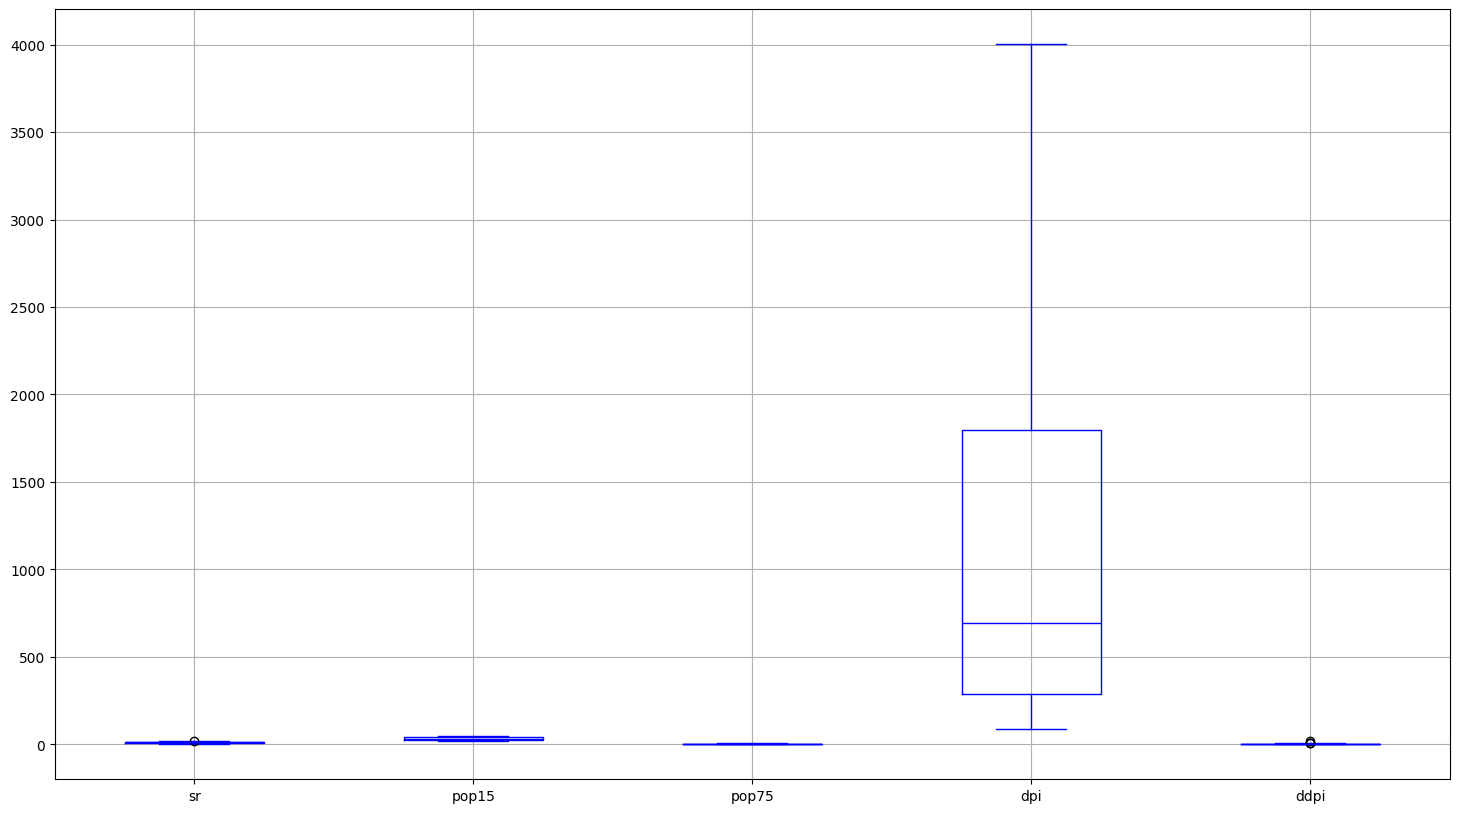

In [9]:
#Visual inspection of the outliers
columns =['sr','pop15','pop75','dpi','ddpi']
df.boxplot(columns,figsize = (18,10),color = 'blue')
plt.show()

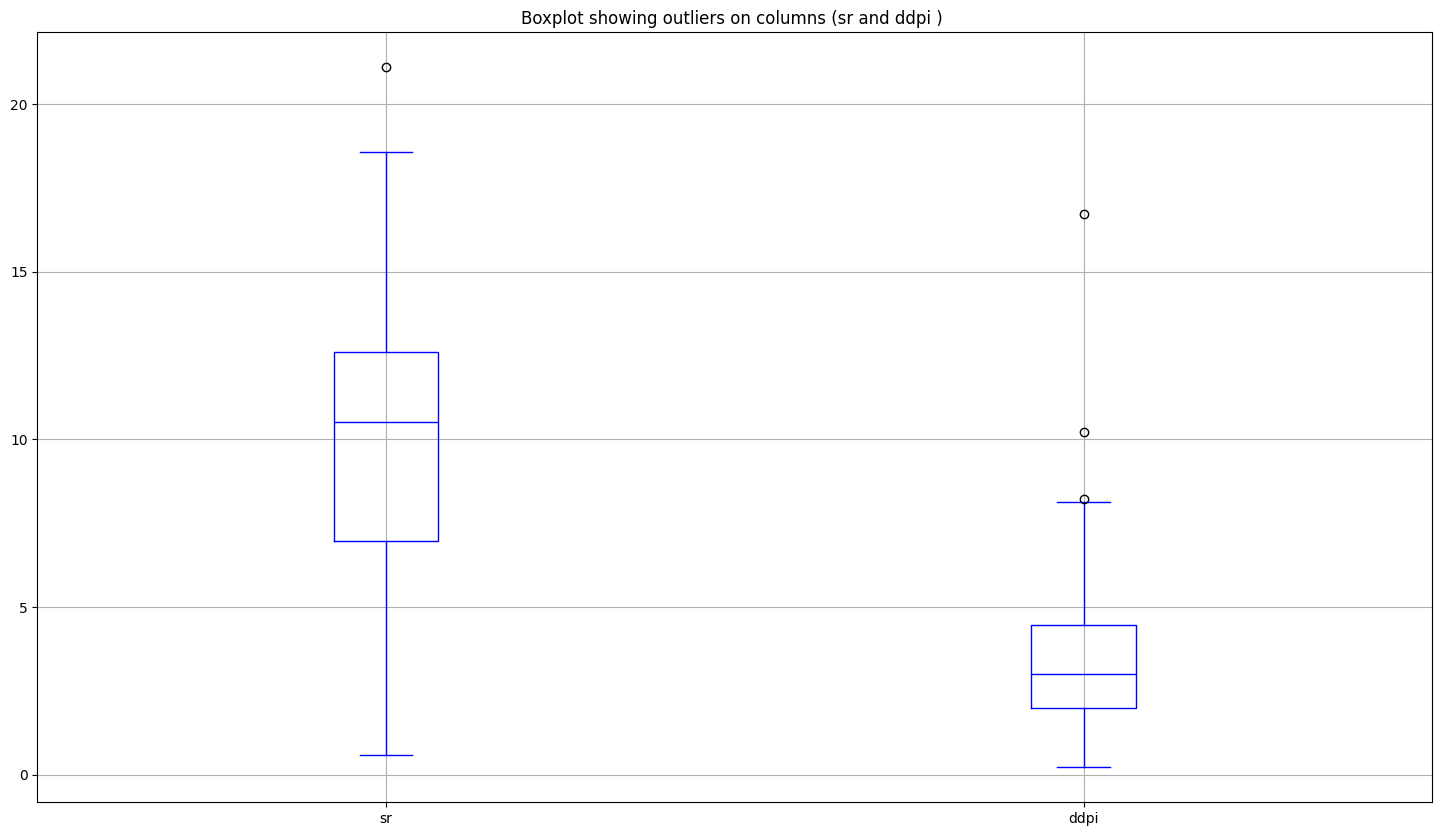

In [10]:
df.boxplot(['sr','ddpi'],figsize = (18,10),color = 'blue')
plt.title("Boxplot showing outliers on columns (sr and ddpi ) ")
plt.show()

In [11]:
#Statistical Representation
def find_outliers_IQR(df):
    
   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   is_outlier = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]  
   outliers = df[is_outlier.any(axis=1)]            
   return outliers
#Then use the above function to search and find the total outliers  
outliers = find_outliers_IQR(df[columns])

print("number of outliers: "+ str(len(outliers)))



outliers


number of outliers: 3


,sr,pop15,pop75,dpi,ddpi
22,21.10,27.01,1.91,1257.28,8.21
46,7.72,41.12,1.73,380.47,10.23
48,8.89,43.69,2.07,123.58,16.71


- Row 22, 46, 48 are the rows with the outlier beacuse the outlier on column sr appears on row 22 and the ones on column ddpi are on row 22, 46, 48

In [12]:
# using drop capping to remove outliers
# Drop the outlier rows
outlier_rows = [22, 46, 48]  # Row indices to drop
df_cleaned = df.drop(index=outlier_rows)
# Reset the index 
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned

,sr,pop15,pop75,dpi,ddpi
0,11.43,29.35,2.87,2329.68,2.87
1,12.07,23.32,4.41,1507.99,3.93
2,13.17,23.80,4.43,2108.47,3.82
3,5.75,41.89,1.67,189.13,0.22
4,12.88,42.19,0.83,728.47,4.56
5,8.79,31.72,2.85,2982.88,2.43
6,0.60,39.74,1.34,662.86,2.67
7,11.90,44.75,0.67,289.52,6.51
8,4.98,46.64,1.06,276.65,3.08
9,10.78,47.64,1.14,471.24,2.80


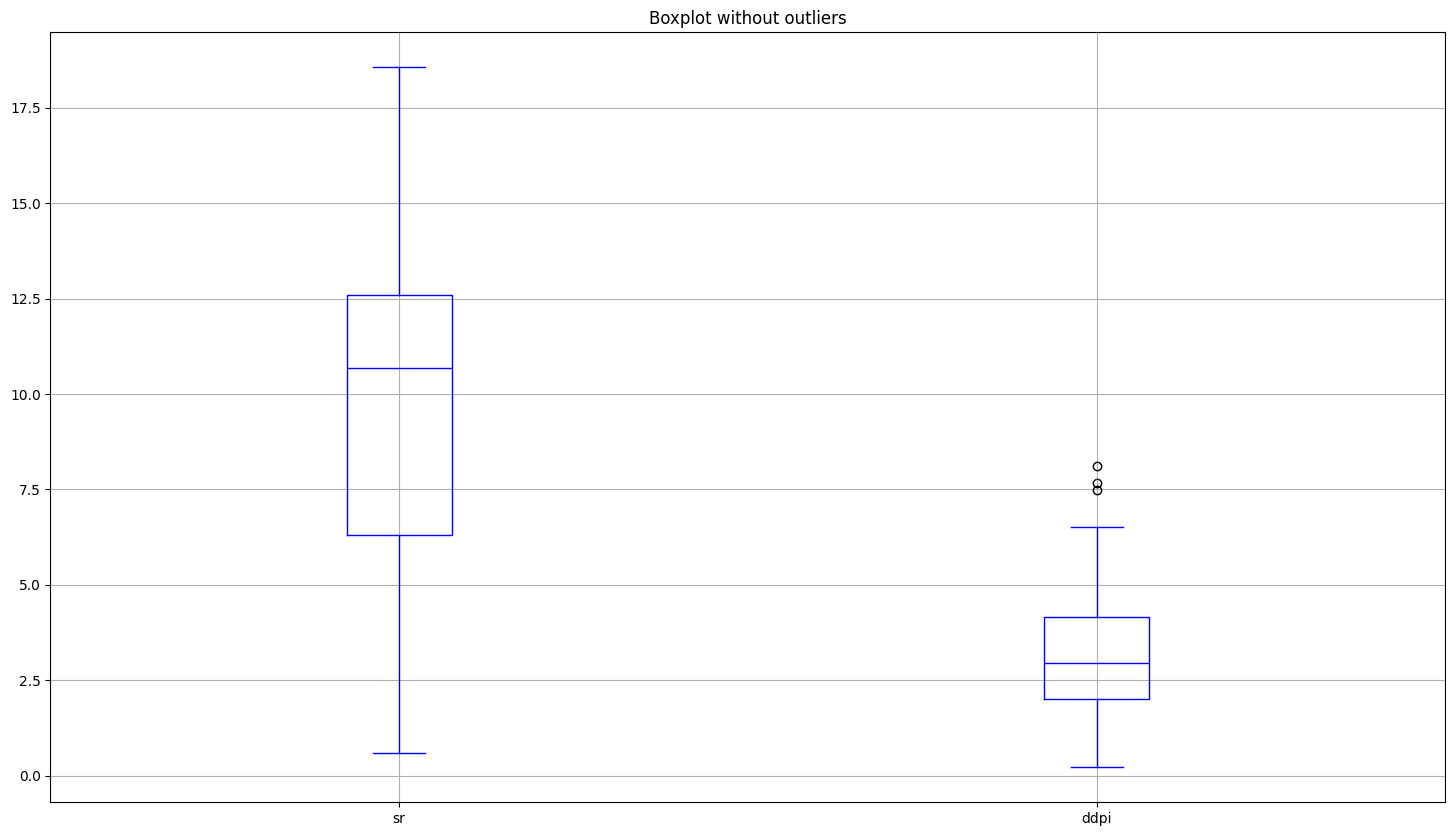

In [13]:
df_cleaned.boxplot(['sr','ddpi'],figsize = (18,10),color = 'blue')
plt.title("Boxplot without outliers")
plt.show()

- ## 2. Calculate the descriptive statistics of all the variables and explain their implication?

In [14]:
df_cleaned.describe(include="all")

,sr,pop15,pop75,dpi,ddpi
count,47.000000,47.000000,47.000000,47.000000,47.000000
mean,9.485957,34.950213,2.317872,1139.927447,3.249574
std,4.290993,9.240066,1.327764,1005.860399,1.876404
min,0.600000,21.440000,0.560000,88.940000,0.220000
25%,6.305000,25.785000,1.100000,288.645000,2.000000
50%,10.670000,32.540000,2.370000,728.470000,2.960000
75%,12.595000,44.470000,3.390000,1857.015000,4.155000
max,18.560000,47.640000,4.700000,4001.890000,8.120000


## 1. Savings Rate (sr):
- The average sr is 9.485957,
Standard Deviation is 4.290993 and
the range is 0.60000 to 12.595000.
This indicates that the average savings rate is around 9.49% (relative healthy), with variation, as seen from the standard deviation
-   This could indicate that a significant portion of income is being set aside for future needs, investments, or emergencies

## 2. Population Under 15 (pop15):
- The mean is 34.950213, 
Standard Deviation is 9.240066 and
the range: 21.440000 to 47.640000
On average, around 35% of the population is under 15, suggesting a youthful demographic in the dataset.
- This could have significant implications for social services, education, and future workforce development.

## 3. Population Over 75 (pop75):
- The average population over 75 is 2.317872,
Standard Deviation is 1.327764 and the
range is 0.560000 to 4.700000
A small proportion of the population is over 75, reflecting a lower elderly population share.
- This may have implications for healthcare, social services, and community planning for example there would be fewer resources and services needed to support an aging population.

## 4. Disposable Income per Capita (dpi):
- The average disposable income per Capita is 1139.927447,
Standard Deviation is 1005.860399 and the
range is 88.94 to 4001.89.
The high standard deviation suggests significant income disparity within the dataset.
- This figure can provide a general sense of the economic well-being of the population, suggesting that individuals have a moderate level of disposable income for savings, spending, and investment.

## 5. Growth Rate of Disposable Income (ddpi):
- The average  Growth rate of disposable income is 3.249574,
Standard Deviation is 2.87 and the
range is 0.22 to 16.71
This variable shows considerable variation in income growth rates, with most values concentrated around a lower average growth rate.
- This could indicate that the economy is experiencing moderate growth, but with significant variation in income growth rates

- ## 3. Generate a graph showing the distribution of the population under 15 (“pop15”).

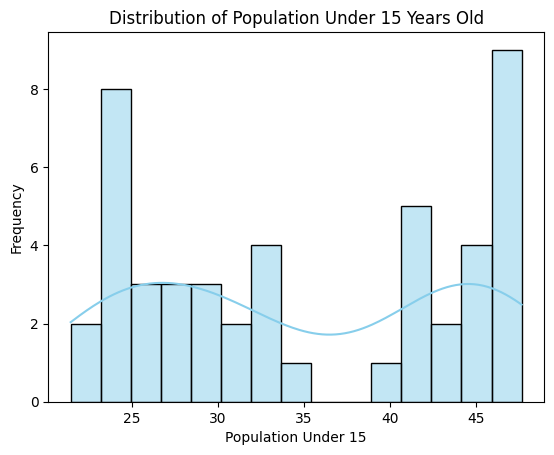

<Figure size 1800x1000 with 0 Axes>

In [15]:
sns.histplot(df_cleaned['pop15'], bins=15, kde= True,color='skyblue')
plt.title('Distribution of Population Under 15 Years Old')
plt.xlabel('Population Under 15')
plt.ylabel('Frequency')
plt.figure(figsize=(18, 10))
plt.show()


- The distribution of the population under 15 (pop15) exhibits a roughly normal shape, peaking at an average of about 35%. This indicates that the majority of savings are concentrated among approximately 25–45% of the population under 15, while there are fewer percentage values at both ends of the spectrum.

## 4.What does the relationship between the population over 75 (“pop75”) and the growth rate of dpi (“ddpi”) look like? Describe the relationship using graphs and statistics. 

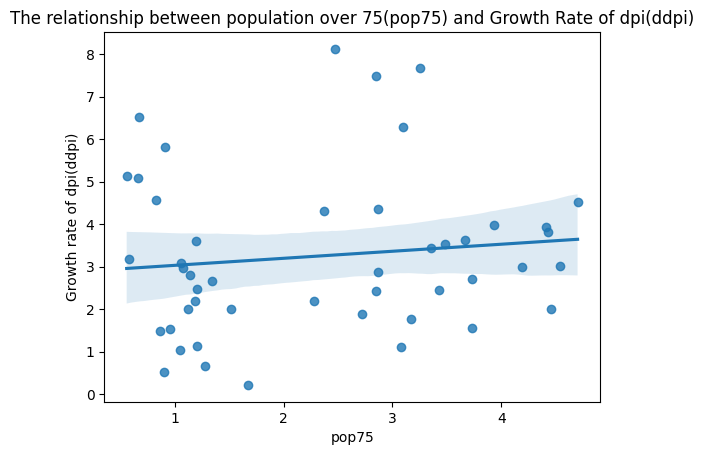

<Figure size 1800x1000 with 0 Axes>

In [16]:
#The relationship between population over 75(pop75) and Growth Rate dpi(ddpi) represented by a reggration plot
sns.regplot(x=df_cleaned['pop75'],y=df_cleaned['ddpi'],data = df_cleaned)
plt.title("The relationship between population over 75(pop75) and Growth Rate of dpi(ddpi)")
plt.xlabel("pop75")
plt.ylabel("Growth rate of dpi(ddpi)")
plt.figure(figsize=(18,10))
plt.show()

In [17]:
# The correlation coefficient of the relationship
# df_cleaned[['pop75','ddpi']].corr()
correlation_pop75_ddpi = df_cleaned['pop75'].corr(df_cleaned['ddpi'])
correlation_pop75_ddpi


np.float64(0.11716431492261015)

- The scatter plot(reggration plot) shows a weak positive relationship which appears to be scattered
- This would indicates that as the population over 75 increases, the growth rate of disposable income per capita also tends to rise. This could suggest that older populations might be contributing positively to economic growth, possibly through increased consumption or investment.


## 5. What is the relationship between aggregate personal saving (“sr”) and real rear disposal income (“dpi)”?

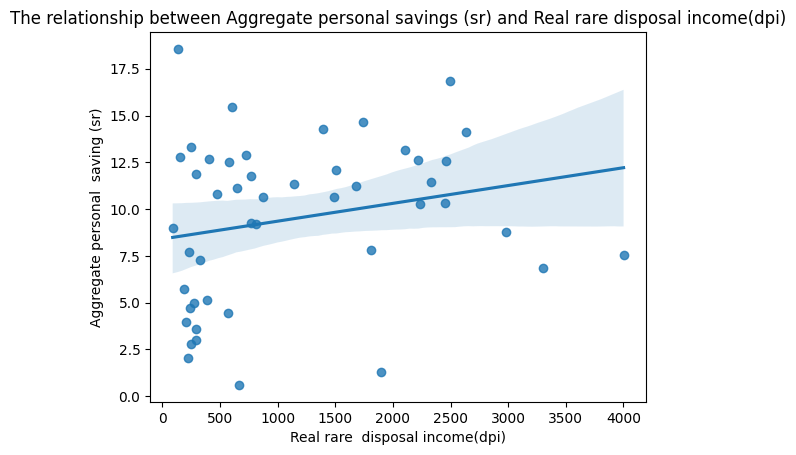

<Figure size 1800x1000 with 0 Axes>

In [18]:
#The relationship between Aggregate personal savings (sr) and Real rare disposal income(dpi) represented by a reggration plot
sns.regplot(x=df_cleaned['dpi'], y=df_cleaned['sr'], data = df_cleaned)
plt.title("The relationship between Aggregate personal savings (sr) and Real rare disposal income(dpi)")
plt.xlabel("Real rare  disposal income(dpi)")
plt.ylabel("Aggregate personal  saving (sr)")
plt.figure(figsize=(18,10))
plt.show()


In [19]:
# The correlation coefficient of the relationship
# df_cleaned[['dpi','sr']].corr()
correlation_pop75_ddpi = df_cleaned['dpi'].corr(df_cleaned['sr'])
correlation_pop75_ddpi

np.float64(0.22322256258570905)

- The scatter plot reveals a robust and direct (strong)positive correlation between Aggregate Personal Savings (sr) and Real Disposable Income Per Capita (dpi), suggesting that as disposable income increases, personal savings also tend to rise proportionally
- This could indicate that individuals are saving a larger portion of their income as their disposable income grows, which may reflect greater financial security or confidence in the economy.